In [7]:
import glob
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./data/input/features.csv')
X = df.drop(columns=['label']).values
y = df['label'].values

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=14)

In [13]:
model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax"),
    
    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-21 10:59:34.922187: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       171,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,138 (1.31 MB)

 Trainable params: 344,138 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.15)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1648 - loss: 7.9321 - val_accuracy: 0.3286 - val_loss: 1.9099
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2658 - loss: 2.1621 - val_accuracy: 0.4117 - val_loss: 1.7007
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3488 - loss: 1.8806 - val_accuracy: 0.4681 - val_loss: 1.5434
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3982 - loss: 1.7266 - val_accuracy: 0.5304 - val_loss: 1.3927
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4611 - loss: 1.5769 - val_accuracy: 0.5957 - val_loss: 1.2350
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5060 - loss: 1.4195 - val_accuracy: 0.6239 - val_loss: 1.1508
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5374 - loss: 1.3414 - val_accuracy: 0.6424 - val_loss: 1.0736
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5886 - loss: 1.2261 - val_accuracy: 0.6958 - val_loss

In [15]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.3791
Validation Loss: 0.403545081615448
Validation Accuracy: 0.8938938975334167


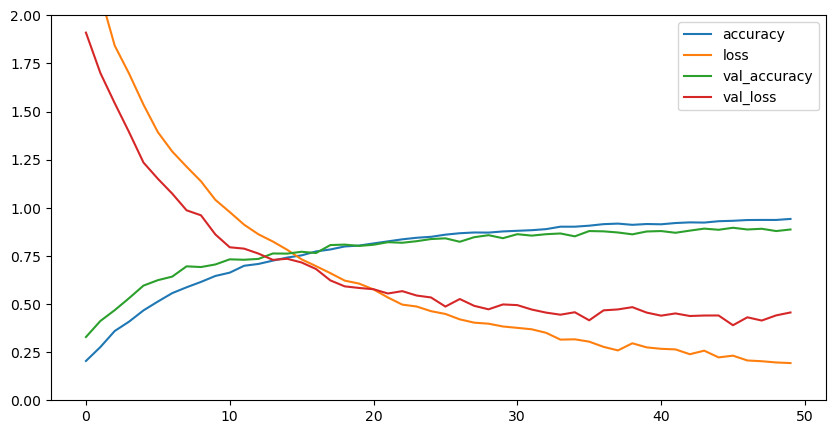

In [16]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.ylim(0, 2)
plt.show()

In [19]:
model.save('./model/modello1.keras')

In [20]:
!pip freeze > requirements.txt